# Лабораторная работа 1.
# Методы оптимизации. Вариант 7
# Выполнил студент 381803-3 Ермолаев Илья

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Наша исходная функция: y(x) = cos(x^3 - x^2 - 1)

Построим ее график, чтобы найти отрезок унимодальности.

<function matplotlib.pyplot.show(close=None, block=None)>

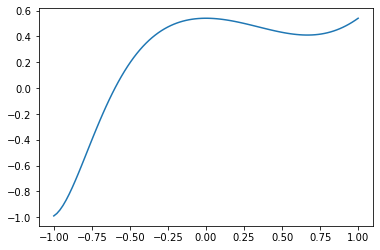

In [2]:
y = lambda x: np.cos(x**3 - x**2 - 1.0)
yDer = lambda x: (-3.0 * (x ** 2) + 2.0 * x) * np.sin(x ** 3 - x ** 2 - 1.0)
y2 = lambda x: -x**2
y2Der = lambda x: 2.0 * x
fig = plt.subplots()
x = np.linspace(-1, 1, 100)
plt.plot(x, y(x))
plt.show

Возьмем отрезок x = [0, 1]

# Наша задача минимизировать нашу функцию на выбранном отрезке, т. е. найти глобальный \ локальный минимум у функции

## Реализуем метод дихотомии

In [3]:
def dichotomyMethod(func, left, right, delta, eps, maxIter):
    a = left
    b = right
    for i in range(maxIter):
        yk = (a + b - delta) / 2.0
        zk = (a + b + delta) / 2.0
        if (func(yk) <= func(zk)):
            b = zk
        else:
            a = yk
        if (abs(b - a) < eps):
            return (b + a) / 2.0
    return null

In [4]:
print('Ответ через метод дихотомии: ' + str(dichotomyMethod(y, 0.0, 1.0, 0.1 ** 7, 0.1 ** 5, 3000)))

Ответ через метод дихотомии: 0.6666679215656282


## Реализуем метод половинного деления

In [5]:
def halfDivisionMethod(func, left, right, eps, maxIter):
    a = left
    b = right
    
    xk = (a + b) / 2.0
    yk = (a + xk) / 2.0
    zk = (xk + b) / 2.0
    
    fkx = func(xk)
    fky = func(yk)
    fkz = func(zk)
    
    for i in range(maxIter):
        yk = (a + xk) / 2.0
        zk = (xk + b) / 2.0
        fky = func(yk)
        fkz = func(zk)
        if (fky <= fkx):
            b = xk
            xk = yk
            fkx = fky
        elif (fkx > fkz):
            a = xk
            xk = zk
            fkx = fkz
        elif (fkx <= fkz):
            a = yk
            b = zk
        if (abs(b - a) < eps):
            return (b + a) / 2.0
    return null

In [6]:
print('Ответ через метод половинного деления: ' + str(halfDivisionMethod(y, 0.0, 1.0, 0.1 ** 5, 3000)))

Ответ через метод половинного деления: 0.6666679382324219


## Реализуем метод золотого сечения

In [7]:
def goldenRatioMethod(func, left, right, eps, maxIter):
    a = left
    b = right
    t = (1.0 + 5 ** 0.5) / 2.0
    yk = b - (b - a) / t
    zk = a + (b - a) / t
    fyk = func(yk)
    fzk = func(zk)
    
    for i in range(maxIter):
        if (fyk <= fzk):
            b = zk
            zk = yk
            fzk = fyk
            yk = b  - (b - a) / t
            fyk = func(yk)
        else:
            a = yk
            yk = zk
            fyk = fzk
            zk = a + (b - a) / t
            fzk = func(zk)
        if (b - a < eps):
            return (b + a) / 2.0
    return null

In [8]:
print('Ответ через метод золотого сечения: ' + str(goldenRatioMethod(y, 0.0, 1.0, 0.1 ** 5, 3000)))

Ответ через метод золотого сечения: 0.6666650591873868


## Реализуем метод Фибоначи

Реализуем получение последовательности Фибоначи:

In [9]:
def createFibSeq(N):
    if (N <= 2):
        return N
    else:
        out = []
        out.append(1)
        out.append(1)
        for i in range(2, N):
            out.append(out[i - 1] + out[i - 2])
        return out

In [10]:
print(createFibSeq(10)[-1])

55


In [11]:
def FibonachiMethod(func, left, right, delta, eps):
    i_N = 3
    N = createFibSeq(i_N)[-1]
    while (N < (right - left) / eps):
        i_N+=1
        N = createFibSeq(i_N)[-1]
    FibSeq = createFibSeq(i_N)
    a = left
    b = right
    y = a + FibSeq[i_N - 3] / FibSeq[i_N - 1] * (b - a)
    z = b - FibSeq[i_N - 3] / FibSeq[i_N - 1] * (b - a)
    fy = func(y)
    fz = func(z)
    k = 0
    while k < (i_N - 3):
        if (fy <= fz):
            b = z
            z = y
            fz = fy
            y = a + FibSeq[i_N - k - 4] / FibSeq[i_N - k - 2] * (b - a)
            fy = func(y)
        else:
            a = y
            y = z
            fy = fz
            z = b - FibSeq[i_N - k - 4] / FibSeq[i_N - k - 2] * (b - a)
            fz = func(z)
        k+=1
    z = y - delta
    if (func(y) <= func(z)):
        b = z
    else:
        a = y
    return (b + a) / 2.0

In [12]:
print('Ответ через метод Фибоначи: ' + str(FibonachiMethod(y, 0.0, 1.0, 0.1 ** 7, 0.1 ** 5)))

Ответ через метод Фибоначи: 0.6666735314227343


# Минимизируем нашу функцию при помощи интерполяции

## Воспользуемся квадратичной интерполяцией

In [13]:
def QuadInterMethod(func, x0, h, eps, delta, maxIter):
    x = []
    y = []
    fmin = 0.0
    xmin = 0.0
    flag1 = True
    flag2 = True
    for j in range(maxIter):
        if (flag2):
            if (flag1):
                x = []
                y = []
                x.append(x0)
            x.append(x[0] + h)
            y.append(func(x[0]))
            y.append(func(x[1]))
            if (y[0] > y[1]):
                x.append(x[0] + 2 * h)
            else:
                x.append(x[0] - h)
            y.append(func(x[2]))
        fmin = min(y)
        xmin = 0.0
        for i in range(len(y)):
            if (fmin == y[i]):
                xmin = x[i]
        beta12 = x[1] ** 2 - x[2] ** 2
        beta20 = x[2] ** 2 - x[0] ** 2
        beta01 = x[0] ** 2 - x[1] ** 2
        gamma12 = x[1] - x[2]
        gamma20 = x[2] - x[0]
        gamma01 = x[0] - x[1]
        denom = gamma12 * y[0] + gamma20 * y[1] + gamma01 * y[2]
        if denom == 0.0:
            x = []
            y = []
            x.append(xmin)
            flag1 = False
            flag2 = True
            continue
        xInt = 0.5 * (beta12 * y[0] + beta20 * y[1] + beta01 * y[2]) / (denom)
        yInt = func(xInt)
        #if (j % 1000 == 0): 
        #    print('xInt ' + str(xInt))
        #    print('xmin ' + str(xmin))
        #    print('fInt ' + str(yInt))
        #    print('fmin ' + str(fmin))
        if (abs(fmin - yInt) < eps) & (abs(xmin - xInt) < eps):
            return xInt
        else:
            sx = x
            sx.sort()
            if (xInt >= sx[0]) & (xInt <= sx[2]):
                x = []
                if (fmin < yInt):
                    x.append(xmin)
                else:
                    x.append(xInt)
                x.append(x[0] + h)
                x.append(x[0] - h)
                y = []
                for i in range(len(x)):
                    y.append(func(x[i]))
                flag1 = True
                flag2 = False
            else:
                x = []
                y = []
                x.append(xInt)
                flag1 = False
                flag2 = True
    return False

In [14]:
print('Ответ через квадратичную интерполяцию: ' + str(QuadInterMethod(y, 0.50, 0.01, 0.1 ** 4, 0.1 ** 4, 3000)))

Ответ через квадратичную интерполяцию: 0.6666166704678813


## Воспользуемся кубической интерполяцией

Для этого нам понадобилась производная нашей функции. Я ее вычислил ручками. За нее отвечает функция yDef.

In [15]:
def sign(x):
    if (x > 0):
        return 1.0
    elif (x == 0):
        return 0.0
    else:
        return -1.0

def CubInterMethod(func, funcDer, x0, h, eps, delta, maxIter):
    flag = True
    xCur = x0
    xPrev = 0.0
    fDer = funcDer(xCur)
    fDerprev = 0.0
    k = 1.0
    if fDer > 0:
        k = -1
    xPrev = xCur
    fDerPrev = fDer
    xCur = xPrev + k * h
    fDer = funcDer(xCur)
    while (fDerPrev * fDer) > 0:
        k *= 2          
        xPrev = xCur
        fDerPrev = fDer
        xCur = xPrev + k * h
        fDer = funcDer(xCur)
    x1 = xPrev
    x2 = xCur
    y1 = func(x1)
    y1Der = funcDer(x1)
    y2 = func(x2)
    y2Der = funcDer(x2)
    xInt = 0.0
    for j in range(maxIter):
        beta1 = y1Der + y2Der - 3.0 * (y1 - y2) / (x1 - x2)
        beta2 = sign(x2 - x1) * (beta1 ** 2 - y1Der * y2Der) ** 0.5
        beta =  (y2Der + beta2 - beta1) / (y2Der - y1Der + 2.0 * beta2)
        xInt = 0.0
        if (beta < 0.0):
            xInt = x2
        elif (0.0 <= beta <= 1.0):
            xInt = x2 - beta * (x2 - x1)
        else:
            xInt = x1
        yInt = func(xInt)
        if (yInt >= y1):
            xInt = 0.5 * (xInt + x1)
            yInt = func(xInt)
            while (yInt > y1):
                xInt = 0.5 * (xInt + x1)
                yInt = func(xInt)
        if abs(xInt) >= 1.0:
            if (abs(funcDer(xInt)) <= eps) & (abs((xInt - x1) / xInt) <=delta):
                return xInt
        else:
            if (abs(funcDer(xInt)) <= eps) & (abs(xInt - x1) <=delta):
                return xInt
        if (funcDer(xInt) * y1Der < 0.0):
            x2 = x1
            y2 = y1
            y2Der = y1Der
            x1 = xInt
            y1 = func(x1)
            y1Der = funcDer(x1)
        elif(funcDer(xInt) * y2Der< 0.0):
            x1 = xInt
            y1 = func(x1)
            y1Der= funcDer(x1)
    return xInt

In [16]:
print('Ответ через кубическую интерполяцию: ' + str(CubInterMethod(y, yDer, 0.5, 0.01, 0.1 ** 4, 0.1 ** 4, 3000)))

Ответ через кубическую интерполяцию: 0.6666666597974895


# Минимизируем функцию методом ломаных и модифицированным методом ломаных

Напишем функцию для поиска константы Липшица.

In [17]:
def constLip(func, a, b, maxIter):
    L = []
    x = []
    i = a
    h = (b - a) / maxIter
    while i <= b:
        x.append(i)
        i += h 
    for j in range (len(x) - 1):    
        L.append(abs(func(x[j + 1]) - func(x[j])) / (x[j + 1] - x[j]))
    return max(L)

## Воспользуемся модифицированным методом ломаных

In [18]:
def modifPolilyneMethod(func, x0, a, b, eps, maxIter):
    L = constLip(func, a, b, 10000)
    h = 2.0 * eps / L
    z = b - 0.5 * h
    x = a + 0.5 * h
    f = func(x)
    xmin = x
    fmin = f
    for i in range(maxIter):
        zn = x + h + (f - fmin) / L
        if (x < z <= zn):
            x = min(zn, b)
            f = func(x)
            if f < fmin:
                xmin = x
                fmin = f
            return xmin
        x = zn
        f = func(x)
        if f < fmin:
            xmin = x
            fmin = f
    print('bbb')
    return xmin

In [19]:
print('Ответ через модифицированный метод ломаных: ' + str(modifPolilyneMethod(y, 0.5, -1.0, 1.0, 0.1 ** 6, 100000)))

Ответ через модифицированный метод ломаных: -0.9999996611535481
